In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of records
n = 10000

# Generate data
data = {
    "Patient Age": np.random.randint(1, 100, n),
    "Procedure Code": np.random.randint(1000, 9999, n),
    "Claim Amount": np.random.uniform(100, 10000, n),
    "Provider Type": np.random.choice(['Hospital', 'Clinic', 'Individual'], n),
    "Pre-existing Condition": np.random.choice([0, 1], n, p=[0.8, 0.2]),
}

# For simplicity, let's assume that claims with a pre-existing condition have a 30% chance of being denied
# and others have a 10% chance.
data["Claim Denied"] = np.where(
    data["Pre-existing Condition"] == 1,
    np.random.choice([0, 1], n, p=[0.7, 0.3]),
    np.random.choice([0, 1], n, p=[0.9, 0.1])
)

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()


,Patient Age,Procedure Code,Claim Amount,Provider Type,Pre-existing Condition,Claim Denied
0,52,5607,788.127186,Hospital,1,0
1,93,4985,5134.921427,Individual,0,0
2,15,4179,916.334972,Clinic,0,0
3,72,5538,7385.877297,Hospital,1,0
4,61,3362,5510.366968,Individual,0,0


EDA

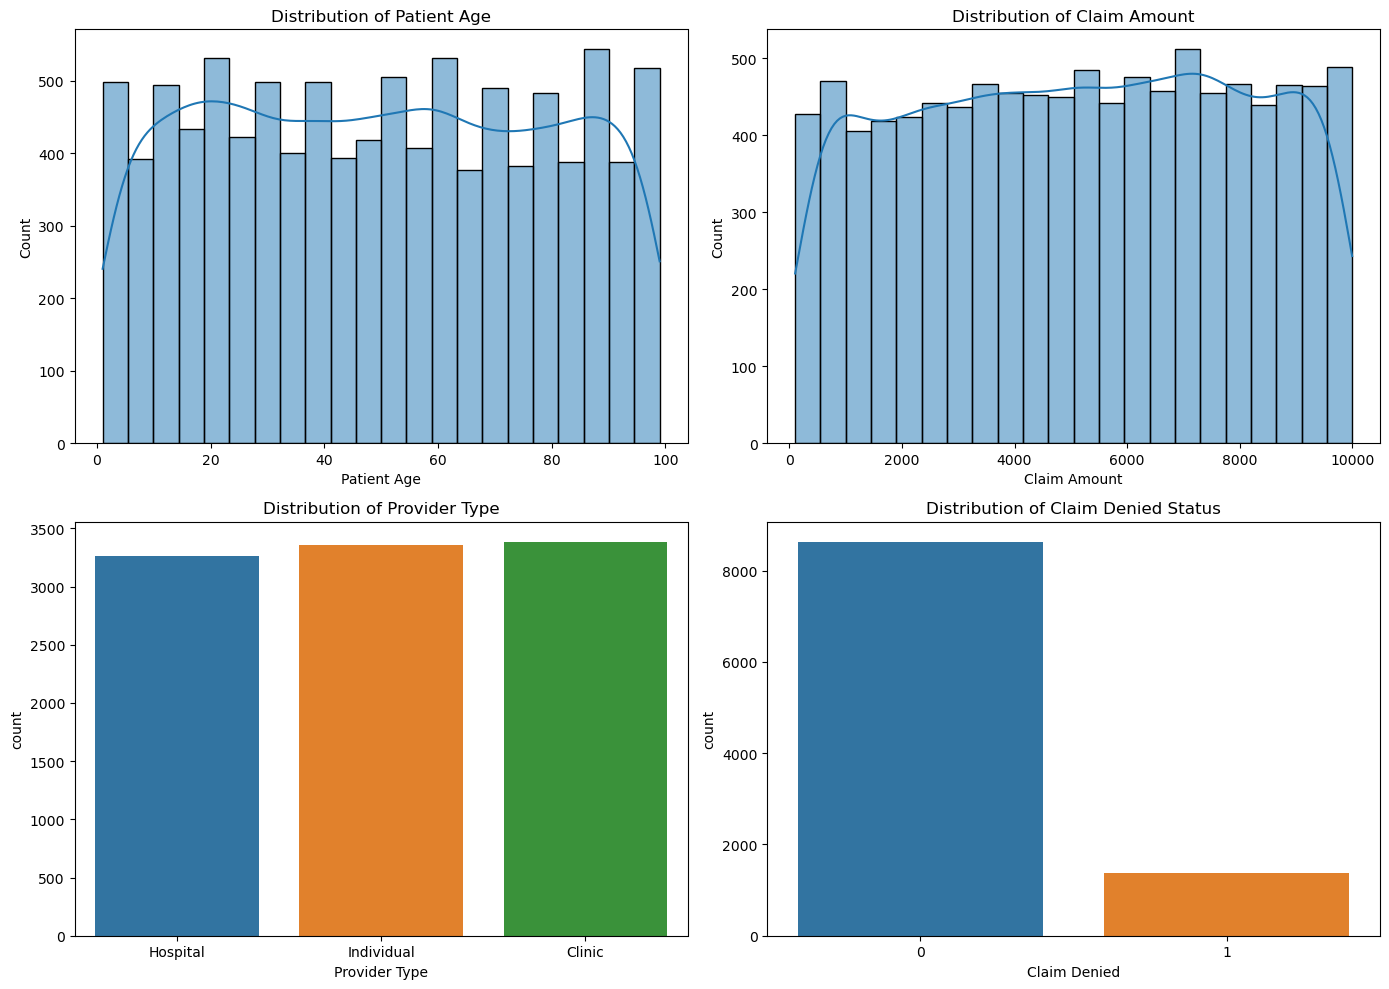

,Patient Age,Procedure Code,Claim Amount,Pre-existing Condition,Claim Denied
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,49.876000,5483.09870,5136.412341,0.198500,0.136500
std,28.611478,2603.17247,2850.042376,0.398891,0.343336
min,1.000000,1000.00000,100.476427,0.000000,0.000000
25%,25.000000,3217.75000,2697.764448,0.000000,0.000000
50%,50.000000,5511.50000,5182.084097,0.000000,0.000000
75%,75.000000,7708.25000,7558.674806,0.000000,0.000000
max,99.000000,9998.00000,9999.255786,1.000000,1.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
summary = df.describe()

# Plot distributions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Age Distribution
sns.histplot(df['Patient Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Patient Age')

# Claim Amount Distribution
sns.histplot(df['Claim Amount'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Claim Amount')

# Provider Type Distribution
sns.countplot(x='Provider Type', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Provider Type')

# Claim Denied Distribution
sns.countplot(x='Claim Denied', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Claim Denied Status')

plt.tight_layout()
plt.show()

summary


Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
X = df.drop("Claim Denied", axis=1)
y = df["Claim Denied"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
numeric_features = ["Patient Age", "Claim Amount"]
numeric_transformer = StandardScaler()

categorical_features = ["Provider Type"]
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transforming the dataset
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train[:5], X_test[:5]  # Displaying first 5 rows of transformed training and testing data


(array([[-0.20163332,  1.18704493,  1.        ,  0.        ],
        [ 0.73860539, -0.09036942,  1.        ,  0.        ],
        [ 0.94754733,  0.44071336,  0.        ,  1.        ],
        [ 1.29578389,  0.82896057,  1.        ,  0.        ],
        [ 0.87790002, -1.21772547,  1.        ,  0.        ]]),
 array([[ 0.56448711, -0.01274225,  0.        ,  1.        ],
        [ 1.01719464,  0.36179731,  1.        ,  0.        ],
        [ 0.32072152, -1.42957836,  1.        ,  0.        ],
        [-1.03740107, -0.49743249,  0.        ,  1.        ],
        [-0.68916451,  1.36087493,  0.        ,  0.        ]]))

Model Training

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8755,
 '              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93      1751\n           1       0.00      0.00      0.00       249\n\n    accuracy                           0.88      2000\n   macro avg       0.44      0.50      0.47      2000\nweighted avg       0.77      0.88      0.82      2000\n',
 array([[1751,    0],
        [ 249,    0]], dtype=int64))

Accuracy: 87.55%

Classification Report:

Precision for Denied Claims (1): 0.00 (The model never predicted a claim to be denied.)
Recall for Denied Claims (1): 0.00 (Of the actual denied claims, none were correctly predicted by the model.)
F1-Score for Denied Claims (1): 0.00

Confusion Matrix: 1751  0
                   249    0


Addressing Class Imbalance

In [5]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model on resampled data
logreg_resampled = LogisticRegression(random_state=42)
logreg_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_resampled = logreg_resampled.predict(X_test)

# Calculate accuracy
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)

# Classification report
report_resampled = classification_report(y_test, y_pred_resampled)

# Confusion matrix
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

accuracy_resampled, report_resampled, conf_matrix_resampled


ModuleNotFoundError: No module named 'imblearn'

In [6]:
# Train logistic regression model with class weights
logreg_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train, y_train)

# Predict on test set
y_pred_weighted = logreg_weighted.predict(X_test)

# Calculate accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

# Classification report
report_weighted = classification_report(y_test, y_pred_weighted)

# Confusion matrix
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

accuracy_weighted, report_weighted, conf_matrix_weighted


(0.5105,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.51      0.64      1751\n           1       0.13      0.53      0.21       249\n\n    accuracy                           0.51      2000\n   macro avg       0.51      0.52      0.43      2000\nweighted avg       0.79      0.51      0.59      2000\n',
 array([[889, 862],
        [117, 132]], dtype=int64))

Accuracy: 51.05%

Classification Report:

Precision for Denied Claims (1): 0.13 (Of the claims predicted as denied, only 13% were actually denied.)
Recall for Denied Claims (1): 0.53 (Of the actual denied claims, 53% were correctly predicted by the model.)
F1-Score for Denied Claims (1): 0.21
Confusion Matrix:  889  862
                   117  132

By adjusting the class weights, we have managed to increase the recall for denied claims from 0% to 53%. However, this has come at the expense of precision, which is now quite low at 13%. Additionally, the overall accuracy has decreased. This is a trade-off we often face when dealing with imbalanced datasets, and the optimal balance depends on the specific business context.